# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import csv
import datetime
import pytz
from datetime import datetime, timedelta
 
Current_Date = datetime.now().strftime ('%d-%b-%Y %H:%M:%S')

from pprint import pprint

# Import API key
from api_keys import api_key, g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# cities = cities[0:10] #comment out later


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Create an empty list to store the responses
response_json = []

# Make a request for each of the indices
# Pretty print JSON for all Cities
for city in cities:
    response = requests.get(url + city + "&appid=" + api_key)
    try:
        if response.status_code == 200:
            response = response.json()
            response_json.append(response)
            pprint(f"Now processing: Id= {response['id']} City= {response['name']} Country= {response['sys']['country']}")
    #         pprint(response)
        else:
            pprint(f"City {city} doesn't exist in database")
    except:
        print("An error occured")

'Now processing: Id= 2381334 City= Atar Country= MR'
'Now processing: Id= 4020109 City= Atuona Country= PF'
'Now processing: Id= 3372707 City= Ribeira Grande Country= PT'
'Now processing: Id= 2075265 City= Busselton Country= AU'
'Now processing: Id= 1861280 City= Itoman Country= JP'
'Now processing: Id= 2639022 City= Royal Tunbridge Wells Country= GB'
'Now processing: Id= 359792 City= Aswan Country= EG'
"City bengkulu doesn't exist in database"
'Now processing: Id= 4035715 City= Avarua Country= CK'
'Now processing: Id= 934479 City= Grand Gaube Country= MU'
'Now processing: Id= 1684803 City= Tabuk Country= PH'
'Now processing: Id= 3382160 City= Cayenne Country= GF'
'Now processing: Id= 4278890 City= Salina Country= US'
'Now processing: Id= 2374583 City= Bubaque Country= GW'
'Now processing: Id= 2525012 City= Cetraro Country= IT'
"City taolanaro doesn't exist in database"
'Now processing: Id= 5856516 City= Ahuimanu Country= US'
'Now processing: Id= 1802276 City= Longyan Country= CN'
'Now

'Now processing: Id= 1507390 City= Dikson Country= RU'
'Now processing: Id= 1714733 City= Dingle Country= PH'
'Now processing: Id= 5847411 City= Kahului Country= US'
'Now processing: Id= 2173911 City= Broken Hill Country= AU'
'Now processing: Id= 2208248 City= Kaitangata Country= NZ'
'Now processing: Id= 2444219 City= Goure Country= NE'
'Now processing: Id= 3420846 City= Qaqortoq Country= GL'
'Now processing: Id= 3393692 City= Itarema Country= BR'
'Now processing: Id= 1808534 City= Helong Country= CN'
'Now processing: Id= 2508813 City= Adrar Country= DZ'
'Now processing: Id= 1279123 City= Akividu Country= IN'
'Now processing: Id= 5881688 City= Fort Saint James Country= CA'
'Now processing: Id= 3831208 City= Qaanaaq Country= GL'
"City amderma doesn't exist in database"
'Now processing: Id= 4845585 City= Westport Country= US'
'Now processing: Id= 986717 City= Kruisfontein Country= ZA'
'Now processing: Id= 6144312 City= Sept-Iles Country= CA'
'Now processing: Id= 5969785 City= Hamilton Co

'Now processing: Id= 6185217 City= Yarmouth Country= CA'
'Now processing: Id= 471245 City= Vozhega Country= RU'
'Now processing: Id= 962367 City= Richards Bay Country= ZA'
'Now processing: Id= 1528998 City= Yumen Country= CN'
'Now processing: Id= 2264923 City= Peniche Country= PT'
'Now processing: Id= 639735 City= Rauma Country= FI'
'Now processing: Id= 4021858 City= Guerrero Negro Country= MX'
'Now processing: Id= 3981391 City= Tomatlan Country= MX'
'Now processing: Id= 6182212 City= Williams Lake Country= CA'
'Now processing: Id= 3372783 City= Ponta Delgada Country= PT'
"City palabuhanratu doesn't exist in database"
'Now processing: Id= 2331447 City= Maiduguri Country= NG'
'Now processing: Id= 4034551 City= Faanui Country= PF'
'Now processing: Id= 2501152 City= Constantine Country= DZ'
'Now processing: Id= 3996322 City= Mazatlan Country= MX'
'Now processing: Id= 3616594 City= San Rafael del Sur Country= NI'
'Now processing: Id= 2396853 City= Omboue Country= GA'
'Now processing: Id= 3

'Now processing: Id= 1501429 City= Kuminskiy Country= RU'
'Now processing: Id= 2514651 City= Los Llanos de Aridane Country= ES'
"City deh rawud doesn't exist in database"
'Now processing: Id= 145531 City= Saurimo Country= AO'
'Now processing: Id= 3527624 City= El Ermitano Country= MX'
'Now processing: Id= 3421319 City= Nuuk Country= GL'
'Now processing: Id= 964712 City= Plettenberg Bay Country= ZA'
'Now processing: Id= 4771808 City= Martinsville Country= US'
'Now processing: Id= 3573374 City= The Valley Country= AI'
'Now processing: Id= 3421765 City= Nanortalik Country= GL'
'Now processing: Id= 2450173 City= Taoudenni Country= ML'
'Now processing: Id= 2377457 City= Nouadhibou Country= MR'
'Now processing: Id= 303750 City= Tall Kayf Country= TR'
'Now processing: Id= 2360073 City= Hounde Country= BF'
'Now processing: Id= 3664659 City= Carauari Country= BR'
'Now processing: Id= 3451138 City= Rio Grande Country= BR'
'Now processing: Id= 1078553 City= Ampanihy Country= MG'
"City da nang doe

'Now processing: Id= 2513562 City= Bajil Country= ES'
'Now processing: Id= 6539761 City= Rome Country= IT'
'Now processing: Id= 7626384 City= Hovd Country= NO'
'Now processing: Id= 4195850 City= Fort Oglethorpe Country= US'
'Now processing: Id= 2026659 City= Bira Country= RU'
'Now processing: Id= 985011 City= Lady Frere Country= ZA'
'Now processing: Id= 3453478 City= Pitanga Country= BR'
'Now processing: Id= 3026141 City= Chatellerault Country= FR'
'Now processing: Id= 2077895 City= Alice Springs Country= AU'
'Now processing: Id= 2267254 City= Lagoa Country= PT'
'Now processing: Id= 3470871 City= Barao de Melgaco Country= BR'
'Now processing: Id= 2398283 City= Mitzic Country= GA'


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
my_dict = pd.Series()
my_df = pd.DataFrame()

# Specify the file to write to
output_path = os.path.join("output", "new.csv")

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    csvwriter.writerow(["Name","Longitude","Latitude","Max Temperature","Humidity","Cloudiness","Wind","Country","Time in City"])
   
    for x in response_json:
        # Determine local time per city. Time now is local STL time, where GMT is 6 hours ahead
        local_time = datetime.now() + timedelta(hours=(x['timezone']/60/60)+6) 
        local_time_fmt = local_time.strftime ('%d-%b-%Y %H:%M:%S')
        
        my_dict= (x['name'],x['coord']['lon'],x['coord']['lat'],((x['main']['temp_max']-273.15)*9/5)+32,
                  x['main']['humidity'],x['clouds']['all'],x['wind']['speed'],x['sys']['country'], local_time_fmt)
        csvwriter.writerow(my_dict) # Export to cvs file

# read from created cvs file
my_df = pd.read_csv(output_path, encoding="ISO-8859-1", low_memory=False)
my_df.head()

,Name,Longitude,Latitude,Max Temperature,Humidity,Cloudiness,Wind,Country,Time in City
0,Atar,-13.05,20.52,75.812,29,100,5.48,MR,16-Nov-2019 17:56:11
1,Atuona,-139.03,-9.80,79.772,71,5,7.76,PF,16-Nov-2019 08:26:11
2,Ribeira Grande,-28.70,38.52,66.200,52,20,2.10,PT,16-Nov-2019 16:56:11
3,Busselton,115.35,-33.64,60.998,58,0,1.91,AU,17-Nov-2019 01:56:11
4,Itoman,127.67,26.12,73.400,64,75,2.10,JP,17-Nov-2019 02:56:11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

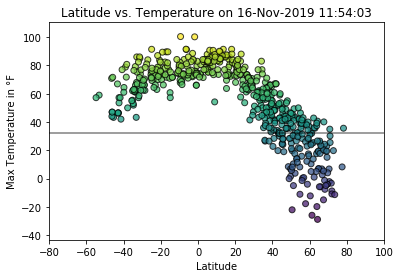

In [22]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Max Temperature']


# Create scatter plot
plt.scatter(x_values, y_values, marker="o", c=y_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(min(my_df['Max Temperature'])*1.5, max(my_df['Max Temperature'])*1.1)

plt.title(f"Latitude vs. Temperature on {Current_Date}")
plt.hlines(32, -80, 100, alpha=.5) # Freezing point
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in °F");

#### Latitude vs. Humidity Plot

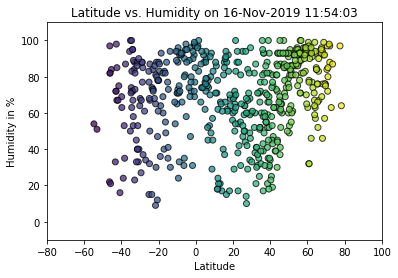

In [23]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Humidity']

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(-10, max(my_df['Humidity'])*1.1)

plt.title(f"Latitude vs. Humidity on {Current_Date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity in %");

#### Latitude vs. Cloudiness Plot

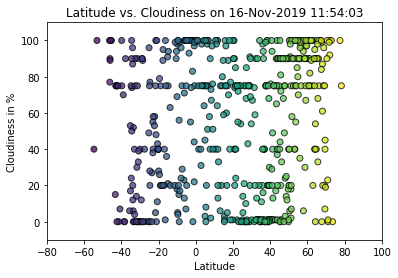

In [24]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Cloudiness']

# Create scatter plot
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(-10, max(my_df['Cloudiness'])*1.1)

plt.title(f"Latitude vs. Cloudiness on {Current_Date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in %");

#### Latitude vs. Wind Speed Plot

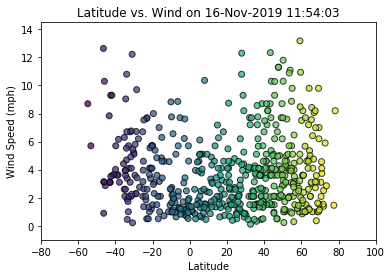

In [25]:
# Set x- and y values
x_values = my_df['Latitude']
y_values = my_df['Wind']
 
# Create scatter plot    
plt.scatter(x_values, y_values, marker="o", c=x_values, edgecolors="black", alpha=0.75)
plt.xlim(-80,100)
plt.ylim(-1, max(my_df['Wind'])*1.1)

plt.title(f"Latitude vs. Wind on {Current_Date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)");

# Conclusions

Temperatures spike around the equator(Latitude is 0 degrees) and drop steadily towards the northern and southern hemisphere. It's obviously summer on the southern half, with no max temperatures below freezing. Many countries above 40 degree latitude are dealing with freezing temperatures day and night.

Overall the humitidy is currently higher in the cities in the most northern hemisphere, compared to those on the sourthern half. Since the cities for this research were picked randomly, it also appear there are far more cities on the northern half than the southern half of the globe.

There's a big spike in windspeed towards the northpole (Latitude over 60 degrees). I also increases when moving south, but there appear to be no or very few cities below -60 degrees latitude.

Another interesting observation is that cloudiness centers around 0, 20, 75,90 and 100%. Seems like cloudiness is rounded in multiples of 5% where these 5 values occur most often.